# Linear Regression Assignment - Boom Bike Sharing

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

### Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
# Importing required Libraries

import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Reading the Data

In [2]:
df=pd.read_csv("day.csv")

### Step 2 : EDA on the read data

In [3]:
#Checking a sample of the data

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Checking size of the data

df.shape

(730, 16)

We have 730 records with 16 columns of data

In [5]:
#Checking data types of columns and null analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


All data points are non-null and therefore do not require any imputation or further analysis

In [6]:
#Checking the spread of numerical columns

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Step 3 : Performing numerical and categorical analysis on the data

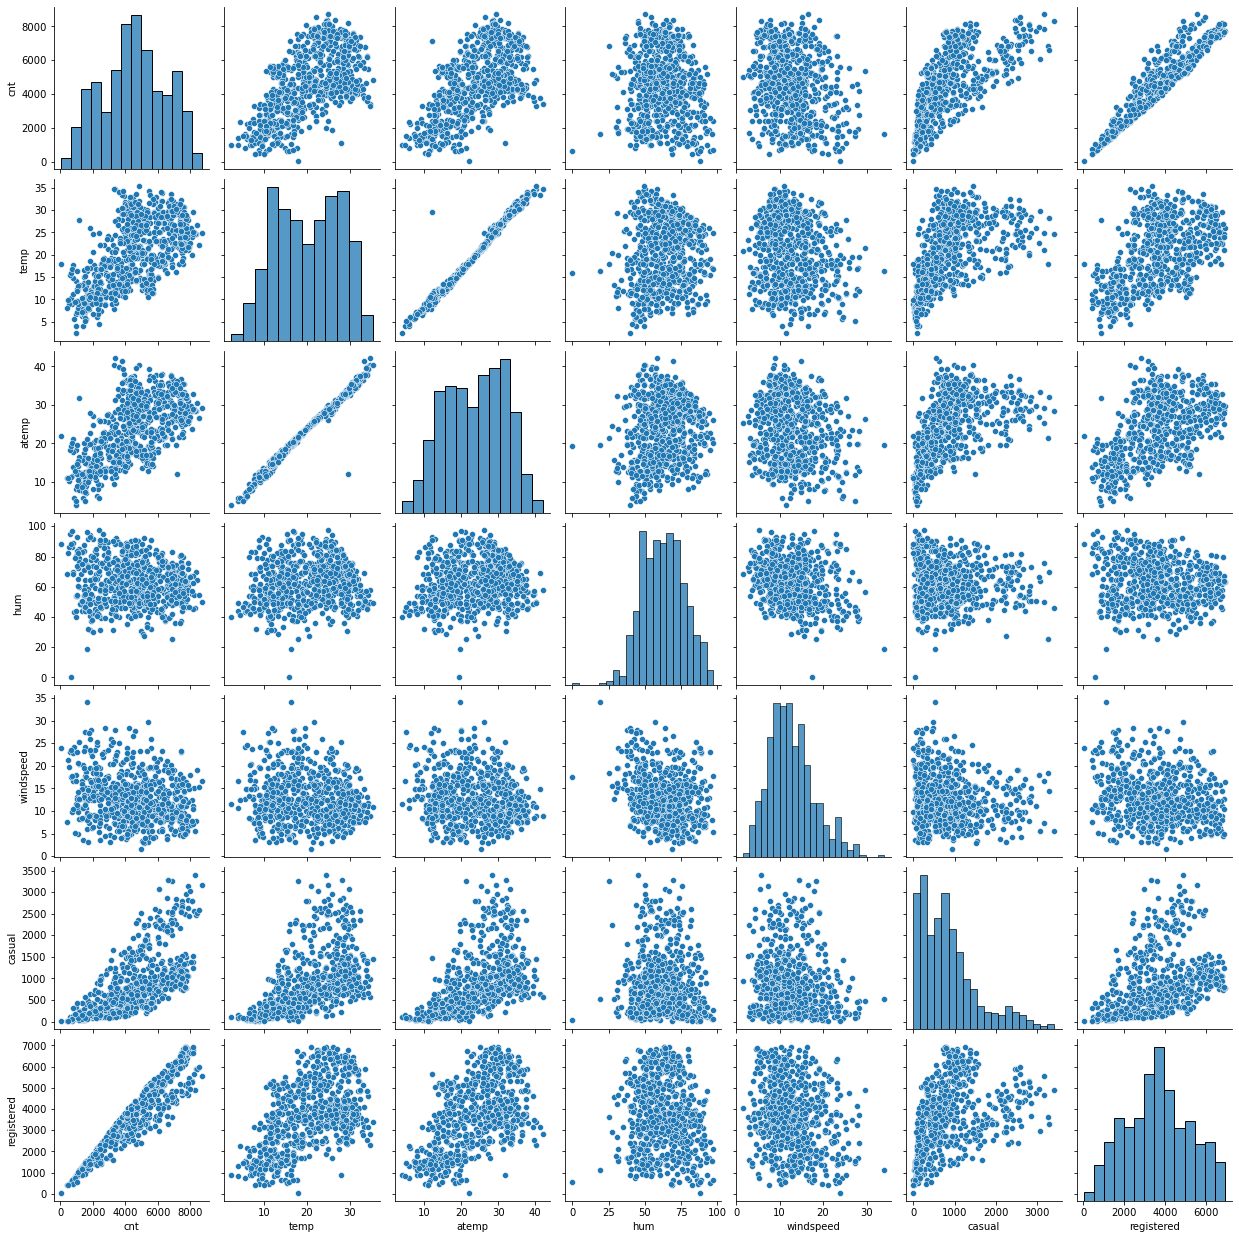

In [7]:
# Pair Plot for numerical variables

vars=["cnt","temp","atemp","hum","windspeed","casual","registered"]
sns.pairplot(df[vars])
plt.show()

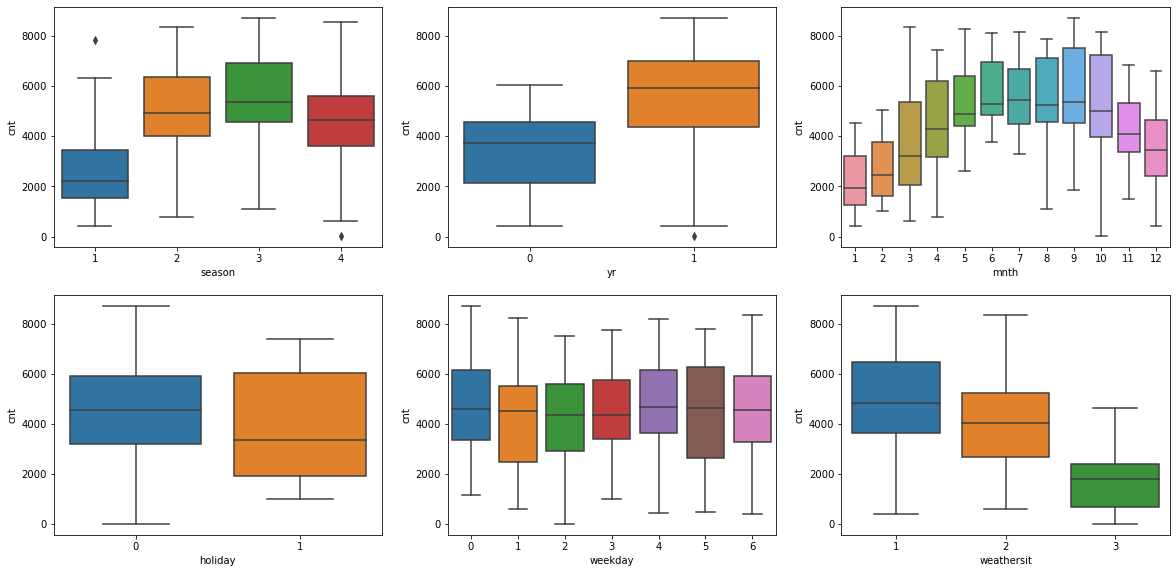

In [8]:
# Box Plots for categorical variables

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.show()

### Inferences from EDA of categorical and numerical variables:

- Season - We can notice a positive trend in the number of customers in 2 - Summer, 3 - Fall and 4 - Winter seasons
- Year - The overall business shows a increasing trend in their user base year on year
- Month - Similar to the season trend, there is a postive trend in the months of summer, fall and winter.
- Holiday : On holidays, the users show a wider spread in the counts. On normal days, the users are more than holidays
- Weekday : Weekdays or weekends do not show any specific trend here.
- Weathersit : Clearer weathers show a postive trend in the number of bike users
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  

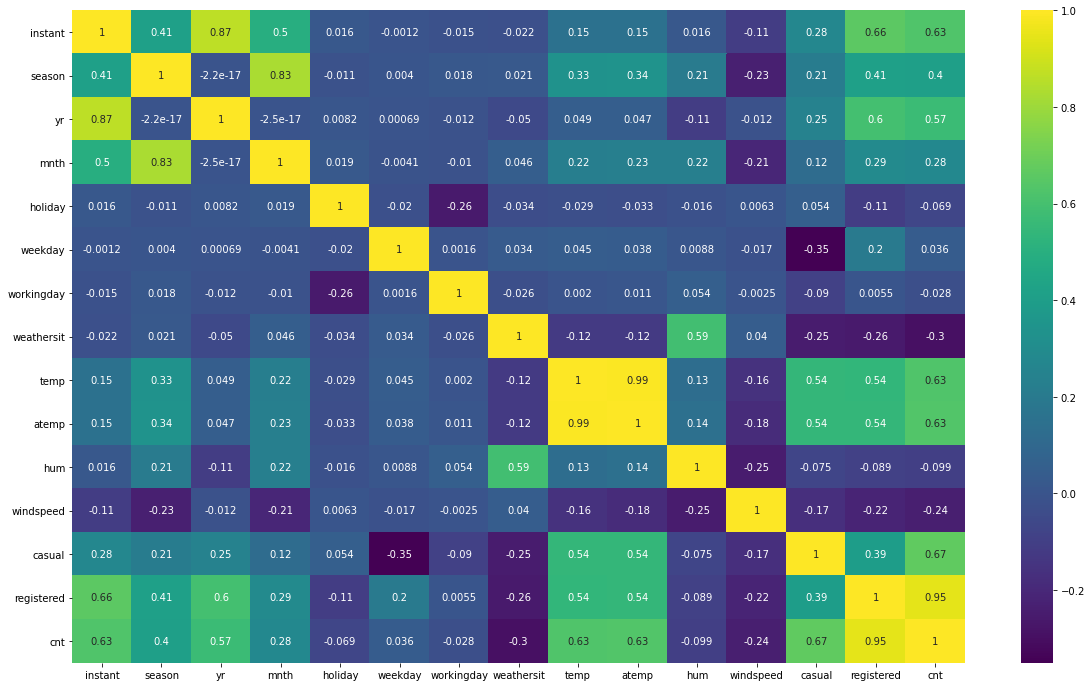

In [9]:
#Visualizing corelations among the variables using a heatmap

plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

#### Lightest and Darkest areas show the most co-relation among the variables.
- Lighest - Positive corelation
- Darkest - Negative corelation

#### From the heatmap, we can infer that the following variables show the most corelation with the target variable
- temperature
- season
- month
- user types; instant, registered and causal
- and season

### Step 4 : Preparing the data

Convert categorical variables into dummy variables

List of categorical variables:
1. season : 1:spring, 2:summer, 3:fall, 4:winter          
2. yr: 0: 2018, 1:2019
3. months : 1 to 12
4. holiday : 0 and 1
5. workingday : 0 and 1
6. weekday : 1 to 6
7. weathersit : 1, 2, 3 and 4

From the list of columns we do not need to convert yr, holiday and workingday since they are already in a binary format.
We will go ahead with converting the other columns.

#### Converting season into dummy variables

In [10]:
# Imputing season column codes with their descriptions

df.season=df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [11]:
# Getting dummy variable for season variable

season=pd.get_dummies(df.season, drop_first=True) #Dropping the first dummy variable


In [12]:
# Checking dummy variable for season

season.describe()

,spring,summer,winter
count,730.000000,730.000000,730.000000
mean,0.246575,0.252055,0.243836
std,0.431313,0.434490,0.429689
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [13]:
# Concatinating season to the original dataframe

df=pd.concat([df,season], axis=1)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


#### Converting weathersit into dummy variables

In [14]:
# checking weathersit column codes with their descriptions

df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

#### We do not have any data points for type 4 weather. We can create only two dummy variables.

In [15]:
# imputing weathersit column codes with their descriptions

df.weathersit=df.weathersit.map({1:'clear', 2:'misty', 3:'cloudy'})

In [16]:
# Checking dummy variable for weathersit

df.weathersit.value_counts()

clear     463
misty     246
cloudy     21
Name: weathersit, dtype: int64

In [17]:
# Getting dummy variable for season variable

weathersit=pd.get_dummies(df.weathersit, drop_first=True) # Dropping the first dummy variable

In [18]:
# Checking dummy variable for season

weathersit.describe()

,cloudy,misty
count,730.000000,730.000000
mean,0.028767,0.336986
std,0.167266,0.473004
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [19]:
# Concatinating weathersit to the original dataframe

df=pd.concat([df,weathersit], axis=1)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,spring,summer,winter,cloudy,misty
0,1,01-01-2018,spring,0,1,0,1,1,misty,14.110847,...,80.5833,10.749882,331,654,985,1,0,0,0,1
1,2,02-01-2018,spring,0,1,0,2,1,misty,14.902598,...,69.6087,16.652113,131,670,801,1,0,0,0,1
2,3,03-01-2018,spring,0,1,0,3,1,clear,8.050924,...,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,4,04-01-2018,spring,0,1,0,4,1,clear,8.200000,...,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,5,05-01-2018,spring,0,1,0,5,1,clear,9.305237,...,43.6957,12.522300,82,1518,1600,1,0,0,0,0


#### Converting month into dummy variables

In [20]:
# imputing month column codes with their descriptions

df.mnth=df.mnth.map({1:'jan', 2:'feb', 3:'mar',4:'apr',5:'may',6:'jun',
                     7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [21]:
df.mnth.value_counts()

oct    62
mar    62
aug    62
jul    62
dec    62
jan    62
may    62
sep    60
apr    60
jun    60
nov    60
feb    56
Name: mnth, dtype: int64

In [22]:
# Getting dummy variable for month variable

mnth=pd.get_dummies(df.mnth, drop_first=True) # Dropping the first dummy variable
mnth.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [23]:
# Concatinating mnth to the original dataframe

df=pd.concat([df,mnth], axis=1)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1,01-01-2018,spring,0,jan,0,1,1,misty,14.110847,...,0,0,1,0,0,0,0,0,0,0
1,2,02-01-2018,spring,0,jan,0,2,1,misty,14.902598,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,spring,0,jan,0,3,1,clear,8.050924,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,spring,0,jan,0,4,1,clear,8.200000,...,0,0,1,0,0,0,0,0,0,0
4,5,05-01-2018,spring,0,jan,0,5,1,clear,9.305237,...,0,0,1,0,0,0,0,0,0,0


#### Converting weekday into dummy variables

In [24]:
# imputing weekday column codes with their descriptions

df.weekday=df.weekday.map({0:'mon', 1:'tues', 2:'wed',3:'thurs',4:'fri',5:'sat',6:'sun'})

In [25]:
df.weekday.value_counts()

tues     105
wed      105
sun      104
mon      104
thurs    104
fri      104
sat      104
Name: weekday, dtype: int64

In [26]:
# Getting dummy variable for weekday variable

weekday=pd.get_dummies(df.weekday, drop_first=True)
weekday.head()
#We would not need all the 7 days here, we will drop off one day

,mon,sat,sun,thurs,tues,wed
0,0,0,0,0,1,0
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,0,0,0,0,0,0
4,0,1,0,0,0,0


In [27]:
# Concatinating mnth to the original dataframe
df=pd.concat([df,weekday], axis=1)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
0,1,01-01-2018,spring,0,jan,0,tues,1,misty,14.110847,...,0,0,0,0,0,0,0,0,1,0
1,2,02-01-2018,spring,0,jan,0,wed,1,misty,14.902598,...,0,0,0,0,0,0,0,0,0,1
2,3,03-01-2018,spring,0,jan,0,thurs,1,clear,8.050924,...,0,0,0,0,0,0,0,1,0,0
3,4,04-01-2018,spring,0,jan,0,fri,1,clear,8.200000,...,0,0,0,0,0,0,0,0,0,0
4,5,05-01-2018,spring,0,jan,0,sat,1,clear,9.305237,...,0,0,0,0,0,1,0,0,0,0


We have now converted all dummy variables for all categorical variables in the data. Let's drop the converted categorical variables from the dataset.

In [28]:
# Dropping season and weathersit
df.drop(columns=['season','weathersit','mnth','weekday'], inplace=True)


In [29]:
# Dropping other irrelevant categorical variables like date and instant from the dataset
df.drop(columns=['instant','dteday'], inplace=True)


#### In the dataset, we have casual and registered users. We are aware that casual and registered user directly contribute to the increase in bike's users. It will be helpful to see if the statistical increase in any of these variables from feature variables.

#### Both the variables complement each other with the target variable cnt. So we will use one of the variable; registered since it has the most linearity with cnt and convert it into a categorical variable. We will use dummy variables from these fields to check for any significance.

### We will convert registered users into categorical variables by performing binning.

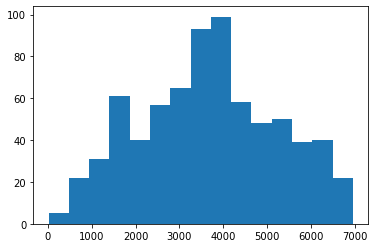

In [30]:
#Checking the data distribution of registered users

plt.hist(df.registered,bins=15)
plt.show()

In [31]:
#Checking quantiles of registered variables in 5 bins

df.registered.quantile([0.2, 0.4, 0.6, 0.8, 1])

0.2    2208.6
0.4    3310.2
0.6    3980.4
0.8    5116.4
1.0    6946.0
Name: registered, dtype: float64

In [32]:
# Defining the names of the bins

bins=['very low','low','medium','high','very high']
df['registered_bin']=pd.qcut(df['registered'],q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=bins)

In [33]:
# Checking the spread of data in the bins

df['registered_bin'].value_counts()

very high    146
high         146
medium       146
low          146
very low     146
Name: registered_bin, dtype: int64

In [34]:
# Getting dummy variable for registered_bin variable

registered_bin=pd.get_dummies(df.registered_bin, drop_first=True) #Dropping the first dummy variable
registered_bin.head()

,low,medium,high,very high
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [35]:
# Concatinating bins to the original dataframe

df=pd.concat([df,registered_bin], axis=1)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,sat,sun,thurs,tues,wed,registered_bin,low,medium,high,very high
0,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,1,0,very low,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,1,very low,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,1,0,0,very low,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,very low,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,1,0,0,0,0,very low,0,0,0,0


#### Dropping other similar variables like date and instant from the dataset.

In [36]:
#Dropping atemp since we have a similar variable temp in the data

df.drop(columns=['atemp'], inplace=True)

#Dropping causal and registered since we can have only one target in the data

df.drop(columns=['casual','registered','registered_bin'], inplace=True)

In [37]:
# Checking the fields in the dataset after data preparation

df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,mon,sat,sun,thurs,tues,wed,low,medium,high,very high
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,1,0,0,0,0,0,0,0,0


### Step 5: Splitting the data into test and train datasets

In [38]:
#loading libraries from sklearn

from sklearn.model_selection import train_test_split

In [39]:
np.random.seed(0)

In [40]:
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=50)

In [41]:
# Checking the shape of train dataset

df_train.shape

(510, 33)

In [42]:
# Checking the shape of train dataset

df_test.shape

(219, 33)

### Step 6: Resclaing the feature variables

From the data, we can see temp, atemp, hum and windspeed have larger and decimal values compared to others. We can normalized the numbers using the MinMax method and have all the numbers within 0 and 1 range.

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [44]:
# Applying fit_transform to normalize temp, atemp, hum and windspeed numerical columns

rescalevar=['temp','hum','windspeed','cnt']
df_train[rescalevar]=scaler.fit_transform(df_train[rescalevar])

In [45]:
# Checking minimum and maximum values of the normalized variables

df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,mon,sat,sun,thurs,tues,wed,low,medium,high,very high
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.482353,0.023529,0.698039,0.552680,0.644848,0.318203,0.509945,0.245098,0.254902,0.250980,...,0.133333,0.137255,0.149020,0.149020,0.137255,0.149020,0.201961,0.198039,0.194118,0.200000
std,0.500179,0.151726,0.459559,0.230600,0.149640,0.167086,0.223408,0.430568,0.436234,0.434003,...,0.340268,0.344454,0.356457,0.356457,0.344454,0.356457,0.401857,0.398913,0.395908,0.400393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343347,0.524581,0.197916,0.350523,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.553497,0.648347,0.295422,0.516222,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757231,0.752576,0.406471,0.672141,0.000000,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 7: Checking linearity and corealtion in the train dataset after rescaling and dummy field conversion

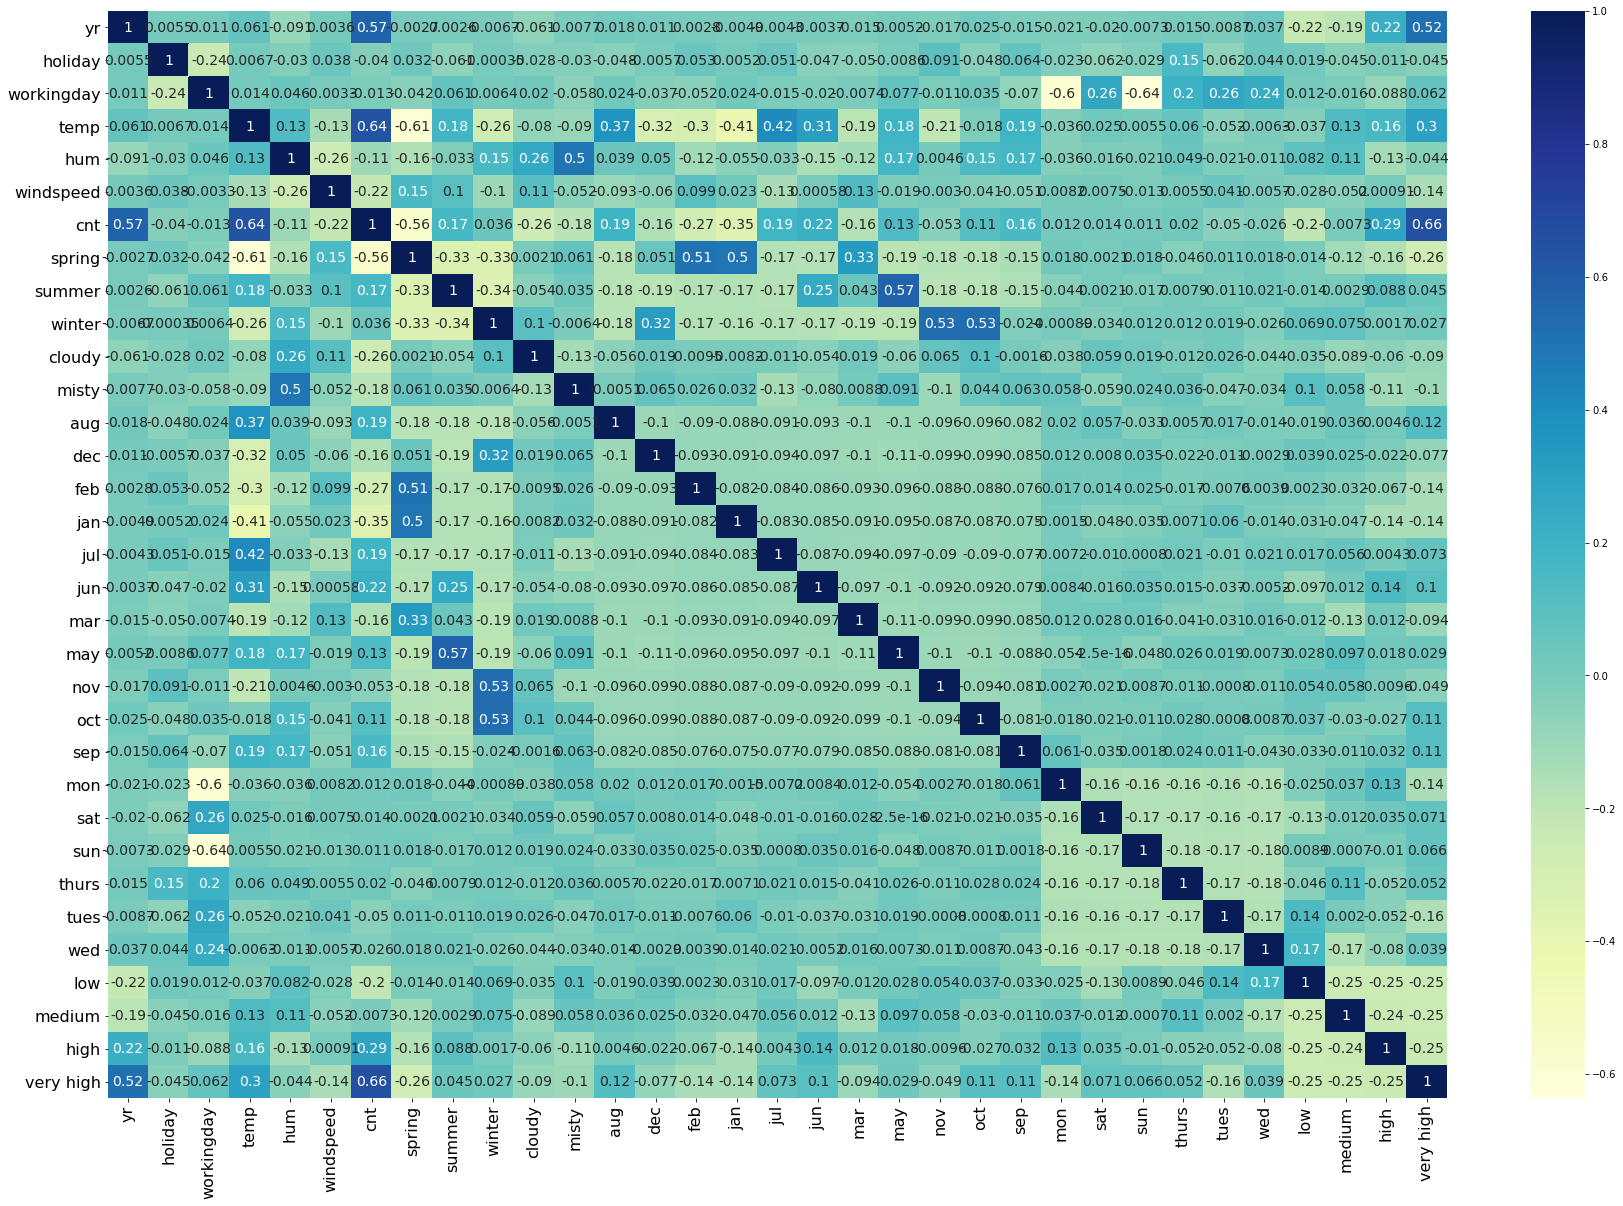

In [46]:
# Plotting a heatmap to check linearity

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu",annot_kws={"fontsize":14})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

#### We can see that temperature has the most corelated to users than any other variable with 0.64 coefficient. We will proceed to try a regression model using temp as our predictor variable. We will not use registered bin variables yet and use them as an experimental addition.

### Step 8: Building our MLR model

#### Model 1: Using a single selected variable - temp

In [47]:
# import statmodels for our MLR

import statsmodels.api as sm

In [48]:
# Creating our feature and target variable datasets in y_train and X_train

y_train=df_train.pop('cnt')
X_train=df_train[:]

In [49]:
# Adding a constant to X_train

X_train_lm=sm.add_constant(X_train['temp'])

In [50]:
# Creating a LR object which we will use to fit the line

lr1 = sm.OLS(y_train, X_train_lm).fit()

In [51]:
#Checking the summary

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     354.0
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           2.56e-60
Time:                        23:14:42   Log-Likelihood:                 176.05
No. Observations:                 510   AIC:                            -348.1
Df Residuals:                     508   BIC:                            -339.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1668      0.020      8.443      0.000       0.128       0.206
temp           0.6209      0.033     18.815      0.000       0.556       0.686
==============================================================================
Omnibus:                        9.967   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                7.009
Skew:                           0.160   Prob(JB):                       0.0301
Kurtosis:                       2.523   Cond. No.                         5.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We have R squared value of 0.41 with just the temperature variable. Meaning 41% of the variance is explained by temperature feature. P-value of the feature is also 0. So, temperature is statistically significant here.

Our line beta 0 is 0.6209 and beta 1 is 0.1668

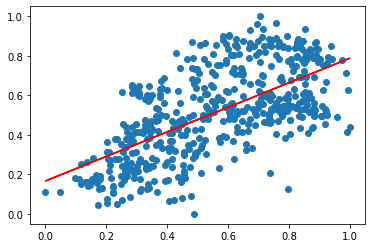

In [52]:
# Plotting our regression line through the target variable

plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.1668 + 0.6209*X_train_lm.iloc[:, 1], 'r')
plt.show()

### Step 8 : Using RFE to select variables

In [53]:
# importing libraries for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#### Since we would be using registered bins as an experimental feature addition, we will exclude those features for RFE selection.

In [54]:
X_train.drop(columns=['low','medium','high','very high'], inplace=True)

In [55]:
# Creating a RFE object

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15) # setting the limit of our feature variables to 15
rfe = rfe.fit(X_train, y_train) #fitting the object on our train dataset

In [56]:
# Result of Recursive elimination of variables and their rankings

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('cloudy', True, 1),
 ('misty', True, 1),
 ('aug', False, 14),
 ('dec', False, 2),
 ('feb', False, 5),
 ('jan', False, 3),
 ('jul', False, 4),
 ('jun', False, 8),
 ('mar', False, 13),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 11),
 ('sep', True, 1),
 ('mon', True, 1),
 ('sat', False, 12),
 ('sun', True, 1),
 ('thurs', False, 10),
 ('tues', False, 9),
 ('wed', False, 6)]

In [57]:
# Storing variables with significant weights in a variable

rfe_vars=X_train.columns[rfe.support_]
rfe_vars

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'cloudy', 'misty', 'nov', 'sep', 'mon', 'sun'],
      dtype='object')

#### Model 2: Building the model using RFE selected variables.

In [58]:
#Creating a train dataset using RFE variables

X_train_rfe=X_train[rfe_vars]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,cloudy,misty,nov,sep,mon,sun
707,1,0,1,0.417140,0.933018,0.243629,0,0,1,0,1,0,0,0,0
172,0,0,1,0.865247,0.729068,0.274549,0,0,0,0,0,0,0,0,0
14,0,0,1,0.223565,0.513954,0.243603,1,0,0,0,1,0,0,0,0
204,0,0,1,0.989306,0.567625,0.267859,0,0,0,0,0,0,0,0,0
182,0,0,1,0.871664,0.458136,0.150755,0,0,0,0,0,0,0,0,0


In [59]:
# Adding a constant to X_train_rfe

X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,cloudy,misty,nov,sep,mon,sun
707,1.0,1,0,1,0.417140,0.933018,0.243629,0,0,1,0,1,0,0,0,0
172,1.0,0,0,1,0.865247,0.729068,0.274549,0,0,0,0,0,0,0,0,0
14,1.0,0,0,1,0.223565,0.513954,0.243603,1,0,0,0,1,0,0,0,0
204,1.0,0,0,1,0.989306,0.567625,0.267859,0,0,0,0,0,0,0,0,0
182,1.0,0,0,1,0.871664,0.458136,0.150755,0,0,0,0,0,0,0,0,0


In [60]:
# Creating a LR object which we will use to fit the line.

lr2 = sm.OLS(y_train, X_train_rfe).fit()

In [61]:
#Checking the summary

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.7
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          6.06e-191
Time:                        23:14:45   Log-Likelihood:                 521.58
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     494   BIC:                            -943.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3657      0.079      4.616      0.000       0.210       0.521
yr             0.2297      0.008     28.847      0.000       0.214       0.245
holiday       -0.1286      0.065     -1.991      0.047      -0.255      -0.002
workingday    -0.0803      0.071     -1.137      0.256      -0.219       0.058
temp           0.5267      0.033     15.904      0.000       0.462       0.592
hum           -0.2149      0.037     -5.766      0.000      -0.288      -0.142
windspeed     -0.1855      0.026     -7.258      0.000      -0.236      -0.135
spring        -0.0523      0.021     -2.515      0.012      -0.093      -0.011
summer         0.0645      0.014      4.732      0.000       0.038       0.091
winter         0.1221      0.017      7.028      0.000       0.088       0.156
cloudy        -0.1989      0.026     -7.761      0.000      -0.249      -0.149
misty         -0.0434      0.011     -4.066      0.000      -0.064      -0.022
nov           -0.0298      0.017     -1.743      0.082      -0.063       0.004
sep            0.0806      0.017      4.630      0.000       0.046       0.115
mon           -0.0513      0.070     -0.729      0.467      -0.190       0.087
sun           -0.0671      0.070     -0.952      0.342      -0.205       0.071
==============================================================================
Omnibus:                       72.994   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.142
Skew:                          -0.753   Prob(JB):                     6.87e-38
Kurtosis:                       5.405   Cond. No.                         67.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From the p-values, we can see that we have variables with high p - values or variables which are not significant.

#### Calculating VIF for model 2

In [62]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,42.63
4,hum,37.23
3,temp,23.52
14,sun,9.64
13,mon,8.35
6,spring,6.27
5,windspeed,5.40
8,winter,4.72
7,summer,2.97
10,misty,2.51


#### Dropping insignificant variables and running the model.

As we can see monday, sunday and novemeber have high p-values. Such variables are insignificant and should be dropped.

We will start with dropping a single variable and recalculate its impact on other variables. Since monday has the highest p-value and and VIF>5. We will drop this variable

#### Model 3: Building the model after dropping monday.

In [63]:
# Dropping monday variable
X_train_rfe.drop(columns='mon', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr3 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.0
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          5.52e-192
Time:                        23:14:45   Log-Likelihood:                 521.30
No. Observations:                 510   AIC:                            -1013.
Df Residuals:                     495   BIC:                            -949.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3138      0.035      9.014      0.000       0.245       0.382
yr             0.2301      0.008     28.983      0.000       0.215       0.246
holiday       -0.0861      0.028     -3.111      0.002      -0.140      -0.032
workingday    -0.0296      0.012     -2.499      0.013      -0.053      -0.006
temp           0.5274      0.033     15.936      0.000       0.462       0.592
hum           -0.2139      0.037     -5.745      0.000      -0.287      -0.141
windspeed     -0.1859      0.026     -7.277      0.000      -0.236      -0.136
spring        -0.0518      0.021     -2.494      0.013      -0.093      -0.011
summer         0.0645      0.014      4.739      0.000       0.038       0.091
winter         0.1221      0.017      7.029      0.000       0.088       0.156
cloudy        -0.1987      0.026     -7.758      0.000      -0.249      -0.148
misty         -0.0434      0.011     -4.074      0.000      -0.064      -0.022
nov           -0.0314      0.017     -1.852      0.065      -0.065       0.002
sep            0.0808      0.017      4.649      0.000       0.047       0.115
sun           -0.0169      0.015     -1.144      0.253      -0.046       0.012
==============================================================================
Omnibus:                       73.866   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.300
Skew:                          -0.763   Prob(JB):                     3.85e-38
Kurtosis:                       5.404   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Recalculating VIF for model 3

In [64]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,30.18
3,temp,16.30
2,workingday,6.08
5,windspeed,4.82
6,spring,4.24
8,winter,3.76
7,summer,2.51
10,misty,2.44
13,sun,2.05
0,yr,1.97


#### As sunday has a high p-value, we will proceed by dropping sunday and recalculating the model

#### Model 4: Building the model after dropping sunday.

In [65]:
# Dropping sunday variable
X_train_rfe.drop(columns='sun', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr4 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.9
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          7.12e-193
Time:                        23:14:45   Log-Likelihood:                 520.63
No. Observations:                 510   AIC:                            -1013.
Df Residuals:                     496   BIC:                            -954.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3068      0.034      8.950      0.000       0.239       0.374
yr             0.2301      0.008     28.978      0.000       0.215       0.246
holiday       -0.0785      0.027     -2.922      0.004      -0.131      -0.026
workingday    -0.0206      0.009     -2.324      0.021      -0.038      -0.003
temp           0.5249      0.033     15.890      0.000       0.460       0.590
hum           -0.2137      0.037     -5.738      0.000      -0.287      -0.141
windspeed     -0.1854      0.026     -7.256      0.000      -0.236      -0.135
spring        -0.0532      0.021     -2.566      0.011      -0.094      -0.012
summer         0.0637      0.014      4.683      0.000       0.037       0.090
winter         0.1209      0.017      6.974      0.000       0.087       0.155
cloudy        -0.1998      0.026     -7.801      0.000      -0.250      -0.149
misty         -0.0433      0.011     -4.059      0.000      -0.064      -0.022
nov           -0.0319      0.017     -1.877      0.061      -0.065       0.001
sep            0.0814      0.017      4.682      0.000       0.047       0.116
==============================================================================
Omnibus:                       72.780   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.984
Skew:                          -0.746   Prob(JB):                     2.74e-38
Kurtosis:                       5.432   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Recalculating VIF for model 4

In [66]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.91
3,temp,15.50
5,windspeed,4.81
6,spring,4.03
8,winter,3.65
2,workingday,3.52
7,summer,2.46
10,misty,2.43
0,yr,1.97
11,nov,1.60


We now have november variable now with a high p-values; 0.06. We will now drop this variable.

#### Model 5: Building the model after dropping nov.

In [67]:
# Dropping sunday variable
X_train_rfe.drop(columns='nov', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr5 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     228.1
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          2.65e-193
Time:                        23:14:45   Log-Likelihood:                 518.83
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     497   BIC:                            -956.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2994      0.034      8.770      0.000       0.232       0.366
yr             0.2301      0.008     28.905      0.000       0.215       0.246
holiday       -0.0840      0.027     -3.138      0.002      -0.137      -0.031
workingday    -0.0205      0.009     -2.306      0.022      -0.038      -0.003
temp           0.5351      0.033     16.382      0.000       0.471       0.599
hum           -0.2158      0.037     -5.783      0.000      -0.289      -0.142
windspeed     -0.1879      0.026     -7.349      0.000      -0.238      -0.138
spring        -0.0474      0.021     -2.307      0.021      -0.088      -0.007
summer         0.0662      0.014      4.879      0.000       0.040       0.093
winter         0.1142      0.017      6.713      0.000       0.081       0.148
cloudy        -0.1986      0.026     -7.738      0.000      -0.249      -0.148
misty         -0.0411      0.011     -3.871      0.000      -0.062      -0.020
sep            0.0846      0.017      4.874      0.000       0.050       0.119
==============================================================================
Omnibus:                       70.347   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.094
Skew:                          -0.731   Prob(JB):                     3.84e-36
Kurtosis:                       5.353   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### As we can see from the summary, we do not have any variables with p-values greater than 0.05. We can next step of our procedure and drop variables with VIF>5.

#### Recalculating VIF for model 5

In [68]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.60
3,temp,15.29
5,windspeed,4.76
6,spring,3.99
2,workingday,3.52
8,winter,3.30
7,summer,2.45
10,misty,2.39
0,yr,1.97
9,cloudy,1.29


#### Model 6: Building the model after dropping hum.

In [69]:
# Dropping sunday variable
X_train_rfe.drop(columns='hum', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr6 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.71e-187
Time:                        23:14:46   Log-Likelihood:                 502.22
No. Observations:                 510   AIC:                            -980.4
Df Residuals:                     498   BIC:                            -929.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2001      0.030      6.571      0.000       0.140       0.260
yr             0.2355      0.008     28.847      0.000       0.219       0.252
holiday       -0.0870      0.028     -3.149      0.002      -0.141      -0.033
workingday    -0.0259      0.009     -2.842      0.005      -0.044      -0.008
temp           0.4879      0.033     14.947      0.000       0.424       0.552
windspeed     -0.1434      0.025     -5.698      0.000      -0.193      -0.094
spring        -0.0623      0.021     -2.960      0.003      -0.104      -0.021
summer         0.0582      0.014      4.180      0.000       0.031       0.086
winter         0.0929      0.017      5.423      0.000       0.059       0.127
cloudy        -0.2634      0.024    -11.057      0.000      -0.310      -0.217
misty         -0.0782      0.009     -8.934      0.000      -0.095      -0.061
sep            0.0690      0.018      3.902      0.000       0.034       0.104
==============================================================================
Omnibus:                       71.644   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.776
Skew:                          -0.749   Prob(JB):                     2.73e-36
Kurtosis:                       5.338   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Recalculating VIF for model 6

In [70]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.80
4,windspeed,4.65
2,workingday,3.38
5,spring,2.21
6,summer,2.02
0,yr,1.96
7,winter,1.77
9,misty,1.57
10,sep,1.20
1,holiday,1.09


We have all of our variables within VIF 5 and almost zero p-values coefficients.

### At this stage, we have an adjusted R-sqaure values 0.83 which means our model explains 83.2% of the variance in the train data.

#### Let us try to manually add some significant variables to check if it improves our model.

In [71]:
# listing columns which have been used in lr6

X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'cloudy', 'misty', 'sep'],
      dtype='object')

In [72]:
# listing columns which can be explored and added to the model

X_train.columns.difference(X_train_rfe.columns)

Index(['aug', 'dec', 'feb', 'hum', 'jan', 'jul', 'jun', 'mar', 'may', 'mon',
       'nov', 'oct', 'sat', 'sun', 'thurs', 'tues', 'wed'],
      dtype='object')

#### June has a co-relation of 0.22 with the count variable. Let's try adding june and recalculating the model.

#### Model 7: Building the model after adding june.

In [73]:
# Adding sunday variable
X_train_rfe['jun']=X_train['jun']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr7 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.2
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          9.19e-187
Time:                        23:14:46   Log-Likelihood:                 503.31
No. Observations:                 510   AIC:                            -980.6
Df Residuals:                     497   BIC:                            -925.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2049      0.031      6.697      0.000       0.145       0.265
yr             0.2359      0.008     28.913      0.000       0.220       0.252
holiday       -0.0849      0.028     -3.071      0.002      -0.139      -0.031
workingday    -0.0252      0.009     -2.755      0.006      -0.043      -0.007
temp           0.4767      0.033     14.240      0.000       0.411       0.543
windspeed     -0.1437      0.025     -5.717      0.000      -0.193      -0.094
spring        -0.0647      0.021     -3.070      0.002      -0.106      -0.023
summer         0.0546      0.014      3.865      0.000       0.027       0.082
winter         0.0919      0.017      5.367      0.000       0.058       0.126
cloudy        -0.2624      0.024    -11.021      0.000      -0.309      -0.216
misty         -0.0773      0.009     -8.822      0.000      -0.095      -0.060
sep            0.0713      0.018      4.021      0.000       0.036       0.106
jun            0.0235      0.016      1.464      0.144      -0.008       0.055
==============================================================================
Omnibus:                       74.628   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.341
Skew:                          -0.764   Prob(JB):                     3.10e-39
Kurtosis:                       5.452   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The p-value increased after adding june. We should drop it.

In [74]:
X_train_rfe.drop(columns='jun', inplace=True)

#### Feb has a negative co-relation of 0.22 with the count variable. Let's try adding february and recalculating the model.


#### Model 8: Building the model after adding feb.

In [75]:
# Adding jun variable and building the model.
X_train_rfe['feb']=X_train['feb']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr8 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.2
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          2.38e-186
Time:                        23:14:46   Log-Likelihood:                 502.33
No. Observations:                 510   AIC:                            -978.7
Df Residuals:                     497   BIC:                            -923.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2002      0.030      6.568      0.000       0.140       0.260
yr             0.2355      0.008     28.823      0.000       0.219       0.252
holiday       -0.0875      0.028     -3.160      0.002      -0.142      -0.033
workingday    -0.0258      0.009     -2.826      0.005      -0.044      -0.008
temp           0.4878      0.033     14.933      0.000       0.424       0.552
windspeed     -0.1437      0.025     -5.704      0.000      -0.193      -0.094
spring        -0.0649      0.022     -2.981      0.003      -0.108      -0.022
summer         0.0582      0.014      4.176      0.000       0.031       0.086
winter         0.0929      0.017      5.417      0.000       0.059       0.127
cloudy        -0.2633      0.024    -11.040      0.000      -0.310      -0.216
misty         -0.0782      0.009     -8.924      0.000      -0.095      -0.061
sep            0.0691      0.018      3.901      0.000       0.034       0.104
feb            0.0084      0.018      0.474      0.636      -0.026       0.043
==============================================================================
Omnibus:                       70.742   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.363
Skew:                          -0.738   Prob(JB):                     5.54e-36
Kurtosis:                       5.337   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The p-value increased after adding feb. We should drop it.

In [76]:
X_train_rfe.drop(columns='feb', inplace=True)

#### We have a december variable which is highly ranked in the RFE. Let us add dec and recalculate the model.

#### Model 9: Building the model after adding dec.

In [77]:
# Adding jun variable and building the model.
X_train_rfe['dec']=X_train['dec']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr9 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.6
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          6.16e-187
Time:                        23:14:46   Log-Likelihood:                 503.73
No. Observations:                 510   AIC:                            -981.5
Df Residuals:                     497   BIC:                            -926.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2118      0.031      6.800      0.000       0.151       0.273
yr             0.2360      0.008     28.948      0.000       0.220       0.252
holiday       -0.0874      0.028     -3.168      0.002      -0.142      -0.033
workingday    -0.0265      0.009     -2.910      0.004      -0.044      -0.009
temp           0.4750      0.033     14.207      0.000       0.409       0.541
windspeed     -0.1458      0.025     -5.795      0.000      -0.195      -0.096
spring        -0.0662      0.021     -3.133      0.002      -0.108      -0.025
summer         0.0552      0.014      3.943      0.000       0.028       0.083
winter         0.0945      0.017      5.519      0.000       0.061       0.128
cloudy        -0.2641      0.024    -11.105      0.000      -0.311      -0.217
misty         -0.0774      0.009     -8.849      0.000      -0.095      -0.060
sep            0.0667      0.018      3.765      0.000       0.032       0.101
dec           -0.0264      0.015     -1.718      0.086      -0.057       0.004
==============================================================================
Omnibus:                       75.577   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.347
Skew:                          -0.776   Prob(JB):                     1.87e-39
Kurtosis:                       5.447   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The p-value increased after adding dec. We should drop it.

In [78]:
X_train_rfe.drop(columns='dec', inplace=True)

### Let us add march variable and recalculate the model.

#### Model 10: Building the model after adding march.

In [79]:
# Adding jan variable and building the model.
X_train_rfe['mar']=X_train['mar']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr10 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          3.74e-187
Time:                        23:14:47   Log-Likelihood:                 504.24
No. Observations:                 510   AIC:                            -982.5
Df Residuals:                     497   BIC:                            -927.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2019      0.030      6.648      0.000       0.142       0.262
yr             0.2358      0.008     28.963      0.000       0.220       0.252
holiday       -0.0837      0.028     -3.030      0.003      -0.138      -0.029
workingday    -0.0256      0.009     -2.817      0.005      -0.044      -0.008
temp           0.4860      0.033     14.928      0.000       0.422       0.550
windspeed     -0.1463      0.025     -5.822      0.000      -0.196      -0.097
spring        -0.0709      0.021     -3.309      0.001      -0.113      -0.029
summer         0.0546      0.014      3.900      0.000       0.027       0.082
winter         0.0923      0.017      5.401      0.000       0.059       0.126
cloudy        -0.2643      0.024    -11.125      0.000      -0.311      -0.218
misty         -0.0779      0.009     -8.924      0.000      -0.095      -0.061
sep            0.0689      0.018      3.904      0.000       0.034       0.104
mar            0.0297      0.015      1.989      0.047       0.000       0.059
==============================================================================
Omnibus:                       73.258   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.493
Skew:                          -0.775   Prob(JB):                     5.19e-36
Kurtosis:                       5.291   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### In this case the p-value is not very high and see an improvement of 0.1% in the R-squared value. Let's check VIF.

#### Recalculating VIF for model 10

In [80]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.80
4,windspeed,4.67
2,workingday,3.38
5,spring,2.43
6,summer,2.06
0,yr,1.96
7,winter,1.77
9,misty,1.57
11,mar,1.29
10,sep,1.20


### The VIF is also in control after adding march. Let's try adding wednesday and check the p-values.

#### Model 11: Building the model after adding wednesday.

In [81]:
# Adding jan variable and building the model.
X_train_rfe['wed']=X_train['wed']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr11 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.2
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          7.71e-187
Time:                        23:14:47   Log-Likelihood:                 506.29
No. Observations:                 510   AIC:                            -984.6
Df Residuals:                     496   BIC:                            -925.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2028      0.030      6.694      0.000       0.143       0.262
yr             0.2363      0.008     29.100      0.000       0.220       0.252
holiday       -0.0778      0.028     -2.808      0.005      -0.132      -0.023
workingday    -0.0208      0.009     -2.222      0.027      -0.039      -0.002
temp           0.4852      0.032     14.948      0.000       0.421       0.549
windspeed     -0.1470      0.025     -5.866      0.000      -0.196      -0.098
spring        -0.0710      0.021     -3.323      0.001      -0.113      -0.029
summer         0.0546      0.014      3.909      0.000       0.027       0.082
winter         0.0917      0.017      5.383      0.000       0.058       0.125
cloudy        -0.2665      0.024    -11.237      0.000      -0.313      -0.220
misty         -0.0783      0.009     -8.993      0.000      -0.095      -0.061
sep            0.0680      0.018      3.863      0.000       0.033       0.103
mar            0.0302      0.015      2.026      0.043       0.001       0.059
wed           -0.0235      0.012     -1.998      0.046      -0.047      -0.000
==============================================================================
Omnibus:                       70.542   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.408
Skew:                          -0.764   Prob(JB):                     3.60e-33
Kurtosis:                       5.167   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The p-value of wednesday is within 0.05 and see a further improvement of 0.2% in R squared. Keeping wednesday. Let's check the VIF.

#### Recalculating VIF for model 11

In [82]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.80
4,windspeed,4.67
2,workingday,3.63
5,spring,2.43
6,summer,2.06
0,yr,1.96
7,winter,1.77
9,misty,1.57
11,mar,1.29
12,wed,1.27


### Let's try adding october and recalculate the model.

#### Model 12: Building the model after adding october.

In [83]:
# Adding october variable and building the model.
X_train_rfe['oct']=X_train['oct']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr12 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.8
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          3.46e-187
Time:                        23:14:47   Log-Likelihood:                 509.87
No. Observations:                 510   AIC:                            -989.7
Df Residuals:                     495   BIC:                            -926.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2231      0.031      7.180      0.000       0.162       0.284
yr             0.2361      0.008     29.248      0.000       0.220       0.252
holiday       -0.0738      0.028     -2.679      0.008      -0.128      -0.020
workingday    -0.0212      0.009     -2.277      0.023      -0.040      -0.003
temp           0.4616      0.033     13.789      0.000       0.396       0.527
windspeed     -0.1489      0.025     -5.975      0.000      -0.198      -0.100
spring        -0.0821      0.022     -3.794      0.000      -0.125      -0.040
summer         0.0509      0.014      3.652      0.000       0.024       0.078
winter         0.0677      0.019      3.525      0.000       0.030       0.105
cloudy        -0.2716      0.024    -11.485      0.000      -0.318      -0.225
misty         -0.0804      0.009     -9.249      0.000      -0.097      -0.063
sep            0.0715      0.018      4.077      0.000       0.037       0.106
mar            0.0306      0.015      2.069      0.039       0.002       0.060
wed           -0.0244      0.012     -2.087      0.037      -0.047      -0.001
oct            0.0467      0.018      2.648      0.008       0.012       0.081
==============================================================================
Omnibus:                       86.663   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.506
Skew:                          -0.873   Prob(JB):                     3.21e-46
Kurtosis:                       5.610   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adding october increased the R squared value by 0.2 %. Checking VIF.

#### Recalculating VIF for model 12

In [84]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.86
4,windspeed,4.67
2,workingday,3.63
5,spring,2.43
7,winter,2.25
6,summer,2.07
0,yr,1.96
9,misty,1.57
13,oct,1.57
11,mar,1.29


### Adding october increased the VIF of temp above 6.41. Since we do not have any significant increase in R-squared values by adding october, we drop it.

In [85]:
X_train_rfe.drop(columns='oct', inplace=True)

### Let's try adding july and recalculate the model.

#### Model 13: Building the model after adding july.

In [86]:
# Adding july variable and building the model.
X_train_rfe['jul']=X_train['jul']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr13 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.7
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          3.63e-186
Time:                        23:14:48   Log-Likelihood:                 507.44
No. Observations:                 510   AIC:                            -984.9
Df Residuals:                     495   BIC:                            -921.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2089      0.031      6.843      0.000       0.149       0.269
yr             0.2359      0.008     29.084      0.000       0.220       0.252
holiday       -0.0756      0.028     -2.729      0.007      -0.130      -0.021
workingday    -0.0211      0.009     -2.253      0.025      -0.040      -0.003
temp           0.4918      0.033     15.033      0.000       0.427       0.556
windspeed     -0.1497      0.025     -5.965      0.000      -0.199      -0.100
spring        -0.0776      0.022     -3.563      0.000      -0.120      -0.035
summer         0.0459      0.015      3.039      0.003       0.016       0.076
winter         0.0843      0.018      4.759      0.000       0.050       0.119
cloudy        -0.2655      0.024    -11.205      0.000      -0.312      -0.219
misty         -0.0792      0.009     -9.088      0.000      -0.096      -0.062
sep            0.0600      0.018      3.267      0.001       0.024       0.096
mar            0.0302      0.015      2.030      0.043       0.001       0.059
wed           -0.0231      0.012     -1.967      0.050      -0.046   -3.05e-05
jul           -0.0277      0.018     -1.499      0.135      -0.064       0.009
==============================================================================
Omnibus:                       70.843   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.268
Skew:                          -0.755   Prob(JB):                     1.92e-34
Kurtosis:                       5.242   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We see high p-value in R squared for July. Dropping the variable.

In [87]:
X_train_rfe.drop(columns='jul', inplace=True)

### Let us try adding very high - registered flag and recalculate the model

#### Model 14: Building the model after adding very high registered variable.

In [88]:
# Adding very-high variable and building the model.
X_train_rfe['very high']=registered_bin['very high']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr14 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     229.7
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          4.27e-206
Time:                        23:14:48   Log-Likelihood:                 554.92
No. Observations:                 510   AIC:                            -1080.
Df Residuals:                     495   BIC:                            -1016.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2133      0.028      7.733      0.000       0.159       0.267
yr             0.1883      0.009     21.504      0.000       0.171       0.206
holiday       -0.0644      0.025     -2.553      0.011      -0.114      -0.015
workingday    -0.0246      0.009     -2.878      0.004      -0.041      -0.008
temp           0.4479      0.030     15.048      0.000       0.389       0.506
windspeed     -0.1209      0.023     -5.270      0.000      -0.166      -0.076
spring        -0.0596      0.019     -3.060      0.002      -0.098      -0.021
summer         0.0537      0.013      4.227      0.000       0.029       0.079
winter         0.0868      0.016      5.593      0.000       0.056       0.117
cloudy        -0.2524      0.022    -11.674      0.000      -0.295      -0.210
misty         -0.0693      0.008     -8.694      0.000      -0.085      -0.054
sep            0.0534      0.016      3.326      0.001       0.022       0.085
mar            0.0287      0.014      2.118      0.035       0.002       0.055
wed           -0.0254      0.011     -2.376      0.018      -0.046      -0.004
very high      0.1189      0.012     10.198      0.000       0.096       0.142
==============================================================================
Omnibus:                       53.729   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.526
Skew:                          -0.544   Prob(JB):                     1.01e-29
Kurtosis:                       5.259   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Recalculating VIF for model 14

In [89]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.99
4,windspeed,4.74
2,workingday,3.63
0,yr,2.75
5,spring,2.48
6,summer,2.06
13,very high,2.02
7,winter,1.77
9,misty,1.59
11,mar,1.29


### We now a adjusted R - Squared value of 86.3% which is better compared to our other models. The VIF's of the feature variables are also in check.

In [90]:
# Printing the feature variables used.

X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'cloudy', 'misty', 'sep', 'mar', 'wed', 'very high'],
      dtype='object')

In [91]:
# Adding the constant

X_train_rfe = sm.add_constant(X_train_rfe)

In [92]:
#Building the model

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [93]:
# Printing the summary

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     229.7
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          4.27e-206
Time:                        23:14:48   Log-Likelihood:                 554.92
No. Observations:                 510   AIC:                            -1080.
Df Residuals:                     495   BIC:                            -1016.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2133      0.028      7.733      0.000       0.159       0.267
yr             0.1883      0.009     21.504      0.000       0.171       0.206
holiday       -0.0644      0.025     -2.553      0.011      -0.114      -0.015
workingday    -0.0246      0.009     -2.878      0.004      -0.041      -0.008
temp           0.4479      0.030     15.048      0.000       0.389       0.506
windspeed     -0.1209      0.023     -5.270      0.000      -0.166      -0.076
spring        -0.0596      0.019     -3.060      0.002      -0.098      -0.021
summer         0.0537      0.013      4.227      0.000       0.029       0.079
winter         0.0868      0.016      5.593      0.000       0.056       0.117
cloudy        -0.2524      0.022    -11.674      0.000      -0.295      -0.210
misty         -0.0693      0.008     -8.694      0.000      -0.085      -0.054
sep            0.0534      0.016      3.326      0.001       0.022       0.085
mar            0.0287      0.014      2.118      0.035       0.002       0.055
wed           -0.0254      0.011     -2.376      0.018      -0.046      -0.004
very high      0.1189      0.012     10.198      0.000       0.096       0.142
==============================================================================
Omnibus:                       53.729   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.526
Skew:                          -0.544   Prob(JB):                     1.01e-29
Kurtosis:                       5.259   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Step 9:  Residual Analysis


In [94]:
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

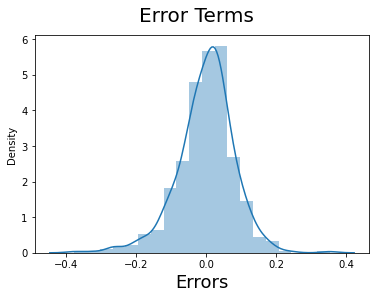

In [95]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Step 10: Validating assumptions on Linear regression

### 1. Linear relationship between target and feature variables.

#### As we can see from the scatter plots, temperature has a clear linear relationship with cnt.

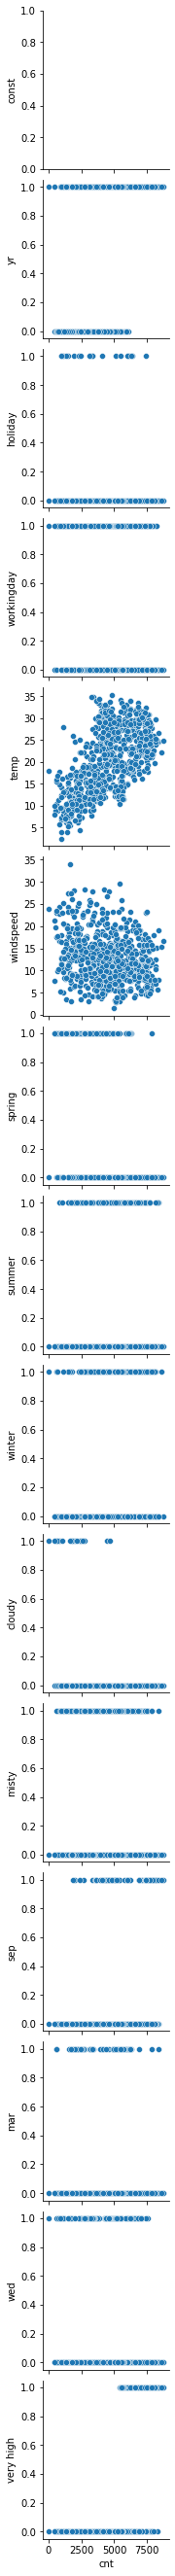

<Figure size 1440x1080 with 0 Axes>

In [96]:
# Pair Plot for numerical variables

sns.pairplot(df, y_vars=X_train_rfe.columns, x_vars='cnt')
plt.figure(figsize = (20, 15))
plt.show()

### 2. Autocorelation in residuals

#### Using Durbin Watson test
#### 0 < DW < 2 : positive autocorrelation
#### 2 < DW < 4 : negative autocorrelation


##### As we can see our Durbin-Watson test gives results close to 2 which is the ideal case for us.

In [97]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     229.7
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          4.27e-206
Time:                        23:14:52   Log-Likelihood:                 554.92
No. Observations:                 510   AIC:                            -1080.
Df Residuals:                     495   BIC:                            -1016.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2133      0.028      7.733      0.000       0.159       0.267
yr             0.1883      0.009     21.504      0.000       0.171       0.206
holiday       -0.0644      0.025     -2.553      0.011      -0.114      -0.015
workingday    -0.0246      0.009     -2.878      0.004      -0.041      -0.008
temp           0.4479      0.030     15.048      0.000       0.389       0.506
windspeed     -0.1209      0.023     -5.270      0.000      -0.166      -0.076
spring        -0.0596      0.019     -3.060      0.002      -0.098      -0.021
summer         0.0537      0.013      4.227      0.000       0.029       0.079
winter         0.0868      0.016      5.593      0.000       0.056       0.117
cloudy        -0.2524      0.022    -11.674      0.000      -0.295      -0.210
misty         -0.0693      0.008     -8.694      0.000      -0.085      -0.054
sep            0.0534      0.016      3.326      0.001       0.022       0.085
mar            0.0287      0.014      2.118      0.035       0.002       0.055
wed           -0.0254      0.011     -2.376      0.018      -0.046      -0.004
very high      0.1189      0.012     10.198      0.000       0.096       0.142
==============================================================================
Omnibus:                       53.729   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.526
Skew:                          -0.544   Prob(JB):                     1.01e-29
Kurtosis:                       5.259   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. No Heteroskedasticity.

#### From the scatter plot, we do not see a funnel like pattern and most of the points are centered around zero. So we do not have any heteroskedasticity.

Text(0, 0.5, 'Residuals')

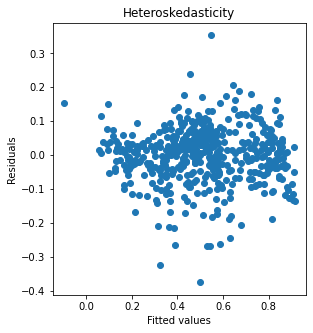

In [98]:
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Heteroskedasticity")
plt.scatter(y_train_pred, (y_train-y_train_pred))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

### 4. No Multicollinearity

#### We have VIFs of all feature variables below 5, so there is no multicollinearity.

In [99]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,56.67
6,spring,5.22
4,temp,3.50
8,winter,3.37
7,summer,2.28
14,very high,1.62
1,yr,1.43
12,mar,1.17
11,sep,1.16
3,workingday,1.15


### 5. Residuals must be normally distributed

#### As we can see from the distribution below, our residuals are normally distributed.

Text(0.5, 0, 'Errors')

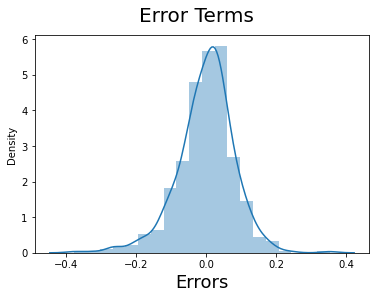

In [100]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Step 10: Making Predictions

#### Applying the scaling on the test sets

In [101]:
#Printing the variables to be scaled

rescalevar

['temp', 'hum', 'windspeed', 'cnt']

In [102]:
#Applying scaling on test data

df_test[rescalevar]=scaler.fit_transform(df_test[rescalevar])

In [103]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,mon,sat,sun,thurs,tues,wed,low,medium,high,very high
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.538813,0.041096,0.671233,0.539449,0.491694,0.417532,0.493500,0.251142,0.246575,0.223744,...,0.164384,0.155251,0.127854,0.123288,0.159817,0.132420,0.196347,0.205479,0.210046,0.200913
std,0.499633,0.198967,0.470841,0.249527,0.202969,0.198978,0.248161,0.434663,0.432005,0.417707,...,0.371472,0.362974,0.334692,0.329520,0.367276,0.339723,0.398144,0.404977,0.408274,0.401601
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.327677,0.347643,0.275323,0.330281,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.555134,0.477380,0.397141,0.488651,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.749763,0.632641,0.536922,0.692159,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
# Splitting target and feature variables

y_test = df_test.pop('cnt')
X_test = df_test[:]

In [105]:
#Printing feature variables

X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring',
       'summer', 'winter', 'cloudy', 'misty', 'sep', 'mar', 'wed',
       'very high'],
      dtype='object')

In [106]:
#Dropping constant variable

X_train_rfe.drop(columns='const', inplace=True)

In [107]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [108]:
# Making predictions

y_pred = lm.predict(X_test_new)

### Step 11: Model Evaluation

Text(0, 0.5, 'y_pred')

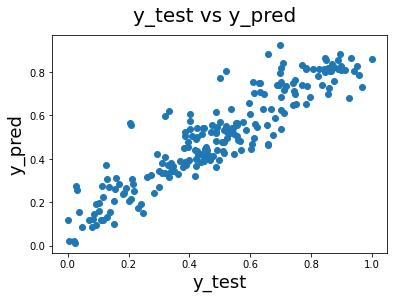

In [109]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=18)                          # Y-label

In [110]:
from sklearn.metrics import r2_score


In [111]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_true=y_train, y_pred=y_train_pred))
print(mean_squared_error(y_true=y_test, y_pred=y_pred))

0.006644141639983698
0.010170895580061616


#### We have a Mean Squared Error close to 0 on the training dataset, meaning our model is able to correctly predict all variances in the data. 

#### On the test validation dataset, MSE is 0.01 also close to zero, meaning our model is able perform similarly on unknown data sets too.

In [112]:
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_pred))

0.866618472591919
0.8340870344444155


### We have a R-squared value of 86.66 % on train data and 83.4% on test data.

# Summary of the assignment

1. We had a dataset with 512 records of data with the target and feature variables.
2. Performed EDA on the dataset to check for significant inferences and identify variables for data preparation. Used scatter plots for numerical and boxplots for categorical variables.
3. Prepared the data by converting categorical variables into dummy variables.
    - season
    - weathersit
    - month
    - weekday
    - registered
4. Dropped irrelevant and categorical variables from the data.
    - season
    - weathersit
    - month
    - weekday
    - instant
    - dteday
    - atemp
    - registered
    - casual
5. Split the data into test and train datasets in a 70:30 ratio.
6. Rescaled numerical variables using MinMax method.
7. Plotted a heatmap to check linearity among all the variables and identified temp to be the most significant feature.
8. Built a model using only temp feature with 41% adjusted R-Square.
9. Adopted RFE for feature selection and built 5 other models to increase adjusted R-square to 83.2%.
10. Manually identified other feature variables and built 6 other models to fine tune the adjusted R-square to 83.5%.
11. Added a binned feature variable - high registered users to increase the accuracy to 86.3%.
12. Performed residual analysis to confirm assumption of residuals hold true.
13. Made predictions on the train data.
14. Evaluated the model on test data with 83.4 % accuracy.